In [2]:
#amazon review data
!pip install faker
!pip install scikit-learn==1.5.2

!pip install langdetect

**1. Data Fetching**

In [48]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from faker import Faker

reviewlist = []

def extractReviews(reviewUrl, pageNumber, fake):
    fake_ipv4 = fake.ipv4()
    print("Fake IPv4 Address:", fake_ipv4)

    headers = {
        'authority': 'www.amazon.in',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'accept-language': 'en-US,en;q=0.9',
        'cache-control': 'max-age=0',
        # Requests sorts cookies= alphabetically
        # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
        'device-memory': '8',
        'downlink': '10',
        'dpr': '0.8',
        'ect': '4g',
        'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
        'rtt': '0',
        'sec-ch-device-memory': '8',
        'sec-ch-dpr': '0.8',
        'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Windows"',
        'sec-ch-viewport-width': '2400',
        'sec-fetch-dest': 'document',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-user': '?1',
        'service-worker-navigation-preload': 'true',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
        'viewport-width': '2400',
    }

    resp = requests.get(reviewUrl, headers=headers, proxies={"http": f"http://{fake_ipv4}"})
    soup = BeautifulSoup(resp.text, 'html.parser')
    reviews = soup.findAll('div', {'data-hook': "review"})
    for item in reviews:
        review = {
            'Review Title': item.find('a', {'data-hook': "review-title"}).text.strip(),
            'Rating': item.find('i', {'data-hook': 'review-star-rating'}).text.strip(),
            'Review Body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
        }
        #print(review)
        reviewlist.append(review)

def pagenum(reviewUrl):
    fake_ipv4 = fake.ipv4()
    print("Fake IPv4 Address:", fake_ipv4)

    headers = {
        'authority': 'www.amazon.in',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'accept-language': 'en-US,en;q=0.9',
        'cache-control': 'max-age=0',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    }
    resp = requests.get(reviewUrl, headers=headers, proxies={"http": f"http://{fake_ipv4}"})
    soup = BeautifulSoup(resp.text, 'html.parser')
    reviews = soup.find('div', {'data-hook': "cr-filter-info-review-rating-count"})
    num_reviews_text = reviews.text.strip().split(", ")
    num = num_reviews_text[1].split(" ")
    out = int(num[0].replace(',', ''))
    return out

# Main program

fake = Faker()

productUrl = input("Enter URL:")
reviewUrl = productUrl.replace("dp", "product-reviews") + "?pageNumber=" + str(1)
totalPg = pagenum(reviewUrl)
print("Total reviews:", totalPg)

if totalPg >= 100:
    totalPg = 10
else:
    totalPg = 3

# Use fake IP for scraping
for i in range(1, totalPg + 1):
    print(f"Running page {i}")
    reviewUrl = productUrl.replace("dp", "product-reviews") + f"/ref=cm_cr_getr_d_paging_btm_{i}?ie=UTF8&pageNumber={i}&reviewerType=all_reviews&pageSize=10"
    print(reviewUrl)
    extractReviews(reviewUrl, i, fake)

df_reviews = pd.DataFrame(reviewlist)
df_reviews


Enter URL:https://www.amazon.in/Apple-iPhone-13-128GB-Blue/dp/B09G9BL5CP/ref=sr_1_1_sspa?sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1
Fake IPv4 Address: 10.180.4.89
Total reviews: 3396
Running page 1
https://www.amazon.in/Apple-iPhone-13-128GB-Blue/product-reviews/B09G9BL5CP/ref=sr_1_1_sspa?sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1/ref=cm_cr_getr_d_paging_btm_1?ie=UTF8&pageNumber=1&reviewerType=all_reviews&pageSize=10
Fake IPv4 Address: 189.3.77.145
Running page 2
https://www.amazon.in/Apple-iPhone-13-128GB-Blue/product-reviews/B09G9BL5CP/ref=sr_1_1_sspa?sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1/ref=cm_cr_getr_d_paging_btm_2?ie=UTF8&pageNumber=2&reviewerType=all_reviews&pageSize=10
Fake IPv4 Address: 176.197.191.156
Running page 3
https://www.amazon.in/Apple-iPhone-13-128GB-Blue/product-reviews/B09G9BL5CP/ref=sr_1_1_sspa?sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1/ref=cm_cr_getr_d_paging_btm_3?ie=UTF8&pageNumber=3&reviewerType=all_reviews&pageSize=10
Fake IPv

,Review Title,Rating,Review Body
0,5.0 out of 5 stars\nRedefining Excellence: A R...,5.0 out of 5 stars,The iPhone 13 128GB has surpassed my expectati...
1,5.0 out of 5 stars\nUsing after 3 months hones...,5.0 out of 5 stars,The media could not be loaded.\n ...
2,"5.0 out of 5 stars\nSo Beautiful, So elegant, ...",5.0 out of 5 stars,I snagged the iPhone 13 during the Great India...
3,4.0 out of 5 stars\nThe iPhone 13 - A Stunning...,4.0 out of 5 stars,"The iPhone 13 is, without a doubt, a game-chan..."
4,5.0 out of 5 stars\nDo I need to say something...,5.0 out of 5 stars,"Great product.. I love android and apple both,..."
...,...,...,...
95,4.0 out of 5 stars\nProduct,4.0 out of 5 stars,Good product
96,4.0 out of 5 stars\nJennie,4.0 out of 5 stars,Nyc phone
97,4.0 out of 5 stars\nNice,4.0 out of 5 stars,
98,5.0 out of 5 stars\nAs Expected Apple is alway...,5.0 out of 5 stars,"Overall very nice product, camera, optimisatio..."


In [3]:
!pip install seaborn wordcloud xgboost 

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.6/124.9 MB 7.6 MB/s eta 0:00:17
   - -------------------------------------- 3.7/124.9 MB 8.7 MB/s eta 0:00:14
   - -------------------------------------- 5.8/124.9 MB 9.3 MB/s eta 0:00:13
   -- ------------------------------------- 8.1/124.9 MB 9.9 MB/s eta 0:00:12
   --- ------------------------------------ 10.2/124.9 MB 10.0 MB/s eta 0:00:12
   ---- ----------------------------------- 12.6/124.9 MB 10.1 MB/s eta 0:00:12
   ---- ----------------------------------- 14.4/124.9 MB 10.2 MB/s eta 0:00:11
   ----- ---------------------------------- 16.8/124.9 MB 10.2 MB/s eta 0:00:11
   ------ --------------------------------- 19.4/124.9 MB 10.4 MB/s eta 0:00:11
   ------ --------------------------------- 21.2/124.9 MB 10.2 MB/s eta 0:00:11
   ------- -------------------------------- 23.1/124.9 MB 10.1 MB/s eta 0:00:11
   -------- ------------------------------- 25.2/124.9 MB

**2. Model Tranning  with Amazon Alexa Data**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\use\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:

data = pd.read_csv(r"amazon_alexa.tsv", delimiter = '\t', quoting = 3)
print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


**Amazon Alexa Reviews Data**

In [8]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
data["feedback"].value_counts()

feedback
1    2893
0     257
Name: count, dtype: int64

**Step:1 Text Classification**

(Stemming)

In [10]:
stemmer = PorterStemmer()
STOPWORDS = set(stopwords.words('english'))

In [11]:
def stemming(data):
    review = str(data)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    #review = re.sub(r'\b(?:heat|bad service|bad customer|bad delivery|bakavas|sad|not|vibrate|hang|overheating|heating|bad|worst|lag|problem|missing|spam|terrible|awful|disappointing|horrible|inadequate|defective|unreliable|subpar|pathetic|dreadful|inferior)\b', 'poor', review, flags=re.IGNORECASE)

    review=review.split()
    review = [stemmer.stem(word) for word in review]
    #review = [stemmer.stem(word) for word in review if not word in STOPWORDS]

    return ' '.join(review)

In [12]:
data["stemming_content"]=data["verified_reviews"].apply(stemming)

In [13]:
data.head()

,rating,date,variation,verified_reviews,feedback,stemming_content
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,love it
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,sometim while play a game you can answer a que...
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,i have had a lot of fun with thi thing my yr o...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


In [14]:
x=data["stemming_content"].values
y=data["feedback"].values

(Count Vectorizer) and (Transformation)

In [15]:
cv = CountVectorizer()

#Storing independent and dependent variables in X and y
x = cv.fit_transform(x).toarray()

y = data['feedback'].values

In [16]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
#Saving the Count Vectorizer
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [20]:
print(x_train.shape,y_train.shape,x_test.shape)

(2520, 2882) (2520,) (630, 2882)


(Scaling)

In [21]:
scaler = MinMaxScaler()

x_train_scl = scaler.fit_transform(x_train)
x_test_scl = scaler.transform(x_test)

In [22]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

(Classification Algorithm)

In [23]:
#model
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train_scl, y_train)

RandomForestClassifier()

In [24]:
x_train_scl

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
with open("rn.pkl","wb") as f:
  pickle.dump(model_rf,f)

(prediction)

In [26]:
pred=model_rf.predict(x_train_scl)
acc=accuracy_score(y_train,pred)

In [27]:
acc

0.9928571428571429

In [28]:

pred1=model_rf.predict(x_test_scl)
acc1=accuracy_score(y_test,pred1)

In [29]:
acc1

0.9428571428571428

***Confusion Matrix***

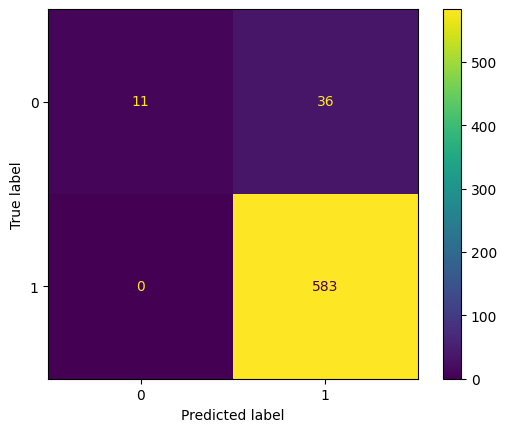

In [30]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

***Classification Report***

In [31]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test,pred1)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        47
           1       0.94      1.00      0.97       583

    accuracy                           0.94       630
   macro avg       0.97      0.62      0.67       630
weighted avg       0.95      0.94      0.93       630



In [32]:
model_rf.predict([x_test_scl[2]])

array([1], dtype=int64)

In [33]:
data[data["feedback"]==0]

,rating,date,variation,verified_reviews,feedback,stemming_content
46,2,30-Jul-18,Charcoal Fabric,"""It's like Siri, in fact, Siri answers more ac...",0,it s like siri in fact siri answer more accur ...
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,sound is terribl if u want good music too get ...
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,not much featur
162,1,30-Jul-18,Sandstone Fabric,"""Stopped working after 2 weeks ,didn't follow ...",0,stop work after week didn t follow command rea...
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,sad joke worthless
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,echo dot respond to us when we aren t even tal...
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,not connect to my phone playlist
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,the onli neg we have on thi product is the ter...
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,i didn t order it


1: positive

0: negative

In [43]:
import pandas as pd

# Load the CSV file into a DataFrame
df_reviews = pd.read_csv("reviews.csv")
print(df_reviews["Review"])

# Assuming you have a stemming function defined like this:
def stemming(text):
    # Add your stemming logic here
    return text  # This is just a placeholder

# Apply the stemming function to the "Review Body" column
df_reviews["test"] = df_reviews["Review"].apply(stemming)

# Extract the values from the stemmed column
x = df_reviews["test"].values


0                                           Classy
1                                    Best one 👍🏻❤️
2                             Best in titne breand
3                          it's looks realy Nice..
4     Gifted it to my love and he just loved it! 🥰
                          ...                     
95                                      Nice watch
96                                            Nice
97                                      Nice watch
98                                  Damage product
99                Good looking and quality product
Name: Review, Length: 100, dtype: object


**Tesing model with amazon fetch data**

In [44]:
#open count vectorization pickle file
with open("countVectorizer.pkl", "rb") as cvf:
    count_vectorizer = pickle.load(cvf)
x_new_count = count_vectorizer.transform(x)


In [46]:
# Convert the sparse matrix to a dense numpy array
x_new_count_dense = x_new_count.toarray()

# Load the scaler and transform the dense data
with open("scaler.pkl", "rb") as sc:
    scaler = pickle.load(sc)
x_new_scaled = scaler.transform(x_new_count_dense)




In [47]:
# Load the trained Random Forest model
with open("rn.pkl", "rb") as fr:
    model_rf = pickle.load(fr)

# Predict using the trained model
pred_new = model_rf.predict(x_new_scaled)

# Print or use the predictions as needed
print(pred_new)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [48]:
dt=list(pred_new)
dt.count(1)

100

In [49]:
len(dt)

100

In [50]:
df_reviews["fed"]=pred_new

In [51]:
df_reviews

,Review,test,fed
0,Classy,Classy,1
1,Best one 👍🏻❤️,Best one 👍🏻❤️,1
2,Best in titne breand,Best in titne breand,1
3,it's looks realy Nice..,it's looks realy Nice..,1
4,Gifted it to my love and he just loved it! 🥰,Gifted it to my love and he just loved it! 🥰,1
...,...,...,...
95,Nice watch,Nice watch,1
96,Nice,Nice,1
97,Nice watch,Nice watch,1
98,Damage product,Damage product,1


Conclusion: By using Random forest the accuracy is not increasing more than 95%. So, there is not accurate prediction. For accurate prediction for sentiment analysis, we have to use LLM for more accuarcy.